In [1]:
import numpy as np
import pandas as pd
from config import args

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

In [2]:
from baseline import *

## Choose metric and data model

In [62]:
loss = 'tau_ols'
model = 'dlvm'

save_plots = False

## Load data

In [4]:
df_mice = load_results('2019-10-24_exp_mi.csv')
df_mice['algo'] = 'mice'
df_mice = df_mice[['model','n','p','prop_miss','seed','method','citcio','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

df_mice_5000 = load_results('2019-10-24_exp_mi.csv')
df_mice_5000['algo'] = 'mice'
df_mice_5000 = df_mice_5000[['model','n','p','prop_miss','seed','method','citcio','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

df_mice = pd.concat((df_mice, df_mice_5000))
df_mice_all = df_mice.copy()
df_mice.head()

results.shape (480, 20)
results.shape (480, 20)


,model,n,p,prop_miss,seed,method,citcio,tau_dr,tau_ols,tau_ols_ps,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,5,0.1,0,glm,False,1.097757,1.096392,1.097914,0.097757,0.096392,0.097914,mice
1,dlvm,1000,100,0.1,0,glm,False,1.044572,1.043477,1.045678,0.044572,0.043477,0.045678,mice
2,dlvm,5000,5,0.1,0,glm,False,1.071130,1.073666,1.080702,0.071130,0.073666,0.080702,mice
3,dlvm,5000,100,0.1,0,glm,False,1.085659,1.075437,1.077248,0.085659,0.075437,0.077248,mice
4,dlvm,1000,5,0.3,0,glm,False,1.089423,1.089637,1.090258,0.089423,0.089637,0.090258,mice


In [67]:
df = load_results('exp_29.1_10_small.csv_temp')
df['num_samples_zmul']=200

df_ = load_results('exp_04.1_11_small.csv_temp')
df_ = df_[list(set(df_.columns) -set(['res_tau_resid','mul_res_tau_resid', 'm']))]
df_['num_samples_zmul']=200
df_ = df_[df.columns]

df_b = load_results('exp_07.1_11_B.csv_temp')
df_b = df_b[list(set(df_b.columns) -set(['res_tau_resid','mul_res_tau_resid', 'm']))]
df_b = df_b[df.columns]

df = pd.concat((df,df_,df_b))

#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


# columns = df.columns.tolist()
# columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

#tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt = ['model', 'n', 'd','p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 'num_samples_zmul',
              'tau_dr', 'tau_ols', 'tau_ols_ps']
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))

df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 'num_samples_zmul',
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df.head()
#df.columns.tolist()

results.shape (374, 24)
results.shape (534, 27)
results.shape (150, 28)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,num_samples_zmul,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,200,1.081424,1.081779,1.081908,0.499922,0.119565,0.081424,0.081779,0.081908,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,200,1.001166,1.001854,0.999689,0.706796,0.663552,0.001166,0.001854,0.000311,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,200,1.103148,1.103060,1.109032,0.412992,0.105296,0.103148,0.103060,0.109032,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,200,0.994866,0.993980,0.995914,0.690837,0.595437,0.005134,0.006020,0.004086,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,200,1.077038,1.076966,1.074978,0.525174,0.127417,0.077038,0.076966,0.074978,MDC.process


In [68]:
df_all = df.copy()

In [37]:
#df_all.nunique()

In [38]:
#best_params, df_best = get_best_params(df, loss = loss)

In [69]:
df = df_all.loc[df_all['model']==model]
df_mice = df_mice_all.loc[df_mice_all['model']==model]

## Small prior variance

Proportion of missing values: 0
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 200, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 0.1, 'n': 1000}
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 50, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 0.1, 'n': 1000}
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 500, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 0.1, 'n': 1000}
{'model': 'dlvm', 'method': 'glm', 'p': 100, 'prop_miss': 0.0, 'citcio': False, 'n': 1000}
['dlvm', 'glm', 100, 0.0, False, 1000]


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 1.0051450160430326 std:  0.010458104140048436
MDC.mi: mean  tau_ols : 0.9991366195420461 std:  0.005731087031144058
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.0036741236400108677
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.0022763567174948 std:  0.0032920065409813844
MDC.mi: mean  tau_ols : 0.9963416239768035 std:  0.0002145049425120726
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.0036741236400108677
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.0015236686954414 std:  0.0038088859831716944
MDC.mi: mean  tau_ols : 0.9989683964731546 std:  0.00132170761271027

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 0.9974884402306632 std:  0.008107167424306954
MDC.mi: mean  tau_ols : 1.001191786052733 std:  0.008143384187599178
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483735 std:  0.004140411075704859
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 0.9838807173869125 std:  0.012612902847001894
MDC.mi: mean  tau_ols : 0.9958831245492444 std:  0.000411046413816396
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483735 std:  0.004140411075704859
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 0.9957279546301356 std:  0.0029248200174135097
MDC.mi: mean  tau_ols : 1.0015744868423258 std:  0.001979158838398165
MF:

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 0.9918537824985736 std:  0.01010136043191842
MDC.mi: mean  tau_ols : 1.00882633293496 std:  0.011036352087635468
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.003198067490855872
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.0015053673331467 std:  0.010746564460870243
MDC.mi: mean  tau_ols : 1.0034813199969452 std:  0.0013358419864172297
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.003198067490855872
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 0.9781713698727055 std:  4.904267498256898e-05
MDC.mi: mean  tau_ols : 1.0132120374953848 std:  0.005556345798177652
MF

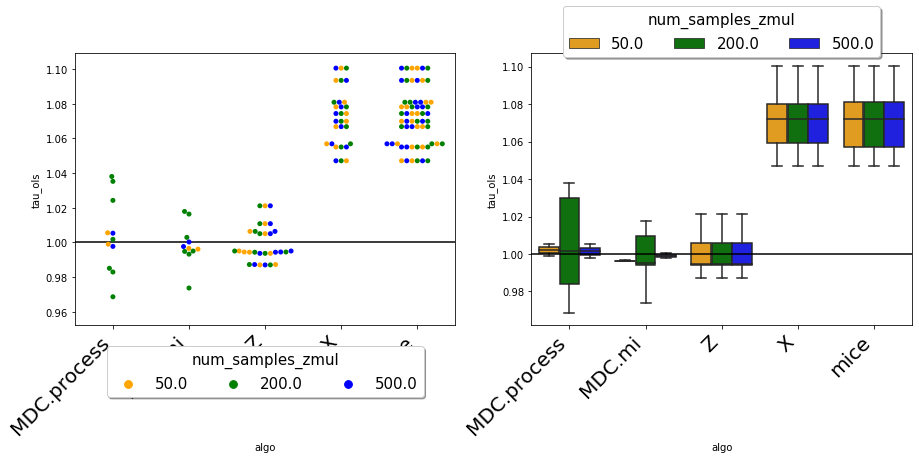

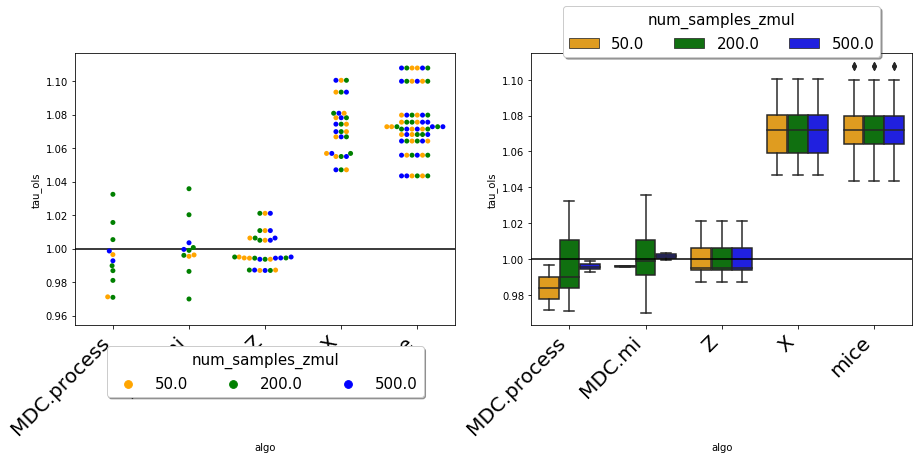

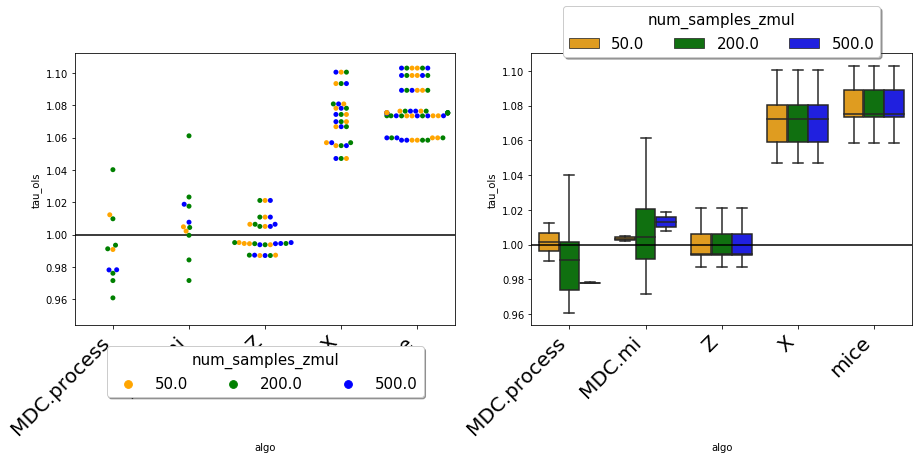

In [34]:
sig_prior = 0.1
n_epochs = 10
n = 1000
p = 100
add_wy = False
citcio = False
full_baseline = True
for prop_miss in [0, 0.1, 0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss,
                              hue = 'num_samples_zmul', palette=['orange','green','blue'], save_plot = 'varyingB.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss,
                          hue = 'num_samples_zmul', palette=['orange','green','blue'])

## Medium prior variance

Proportion of missing values: 0
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 200, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 1.0, 'n': 1000}
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 50, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 1.0, 'n': 1000}
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 500, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 1.0, 'n': 1000}
{'model': 'dlvm', 'method': 'glm', 'p': 100, 'prop_miss': 0.0, 'citcio': False, 'n': 1000}
['dlvm', 'glm', 100, 0.0, False, 1000]


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 1.076513322980461 std:  nan
MDC.mi: mean  tau_ols : 1.061608449080086 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.0036741236400108677
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.0983605573436022 std:  nan
MDC.mi: mean  tau_ols : 1.0863552012134023 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.0036741236400108677
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.0585590700835217 std:  nan
MDC.mi: mean  tau_ols : 1.0487935395608754 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0723262409

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 1.0654832325832542 std:  nan
MDC.mi: mean  tau_ols : 1.0525867341265027 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483735 std:  0.004140411075704859
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.034841688612612 std:  nan
MDC.mi: mean  tau_ols : 1.0159543363093606 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483735 std:  0.004140411075704859
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.068361723384417 std:  nan
MDC.mi: mean  tau_ols : 1.0614479525168468 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 0.9945859764925282 std:  nan
MDC.mi: mean  tau_ols : 0.9857710083895004 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.003198067490855872
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.1146449154703495 std:  nan
MDC.mi: mean  tau_ols : 1.0854932658678689 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.003198067490855872
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.0551816008303911 std:  nan
MDC.mi: mean  tau_ols : 1.0388416643772078 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.07832966

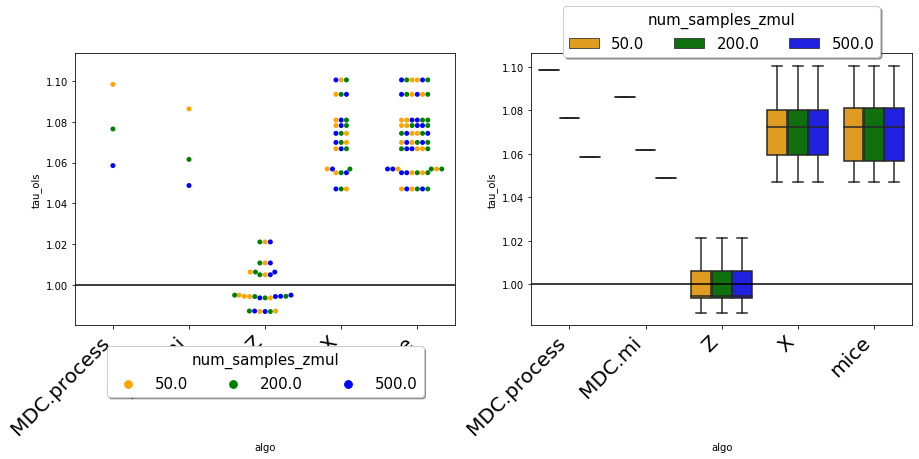

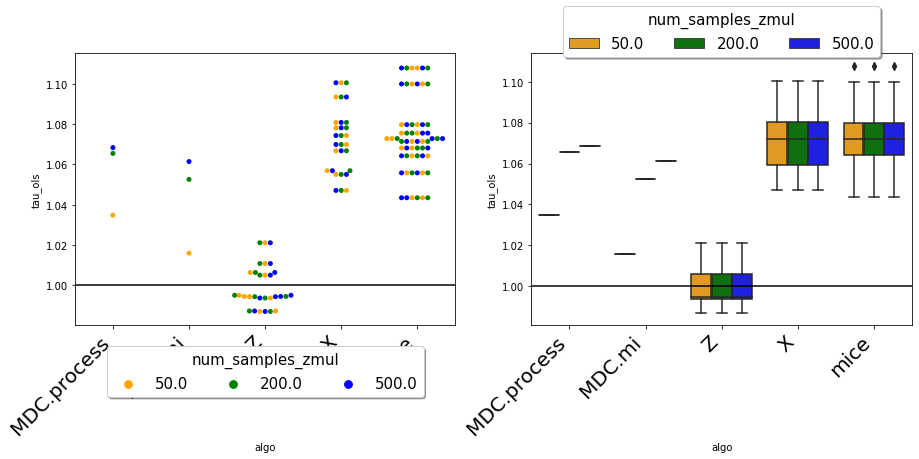

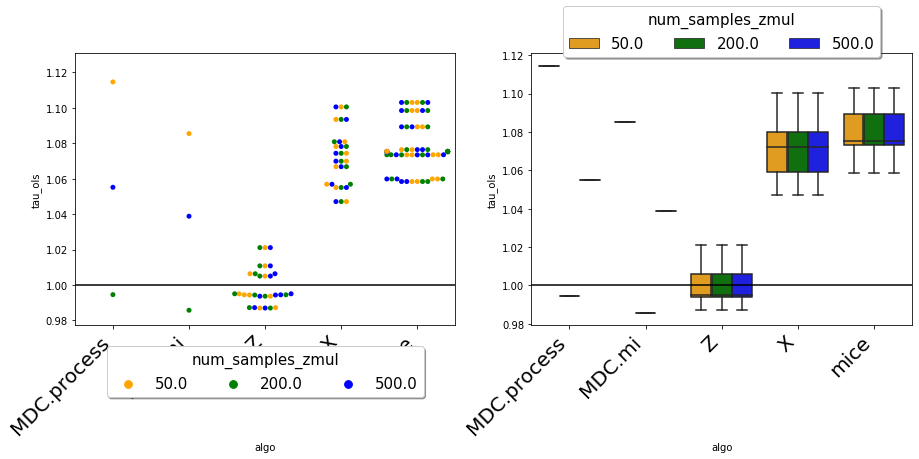

In [32]:
sig_prior = 1
n_epochs = 10
n = 1000
p = 100
add_wy = False
citcio = False
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['seed'] == 0) & (df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss, 
                              hue = 'num_samples_zmul', palette=['orange','green', 'blue'], save_plot = 'varyingB.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['seed'] == 0) & (df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss, 
                          hue = 'num_samples_zmul', palette=['orange','green', 'blue'])


## Large prior variance

Proportion of missing values: 0
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 200, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 10.0, 'n': 1000}
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 50, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 10.0, 'n': 1000}
best_params= {'n_epochs': 10, 'model': 'dlvm', 'd': 3, 'method': 'glm', 'd_miwae': 3, 'p': 100, 'add_wy': False, 'num_samples_zmul': 500, 'prop_miss': 0.0, 'citcio': False, 'sig_prior': 10.0, 'n': 1000}
{'model': 'dlvm', 'method': 'glm', 'p': 100, 'prop_miss': 0.0, 'citcio': False, 'n': 1000}
['dlvm', 'glm', 100, 0.0, False, 1000]


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 1.071322262100143 std:  nan
MDC.mi: mean  tau_ols : 1.0728127970026875 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.0036741236400108677
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.0402867526419306 std:  nan
MDC.mi: mean  tau_ols : 1.0451606300241167 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.0036741236400108677
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.0455569981185926 std:  nan
MDC.mi: mean  tau_ols : 1.0491332857885562 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 1.0900431527593517 std:  nan
MDC.mi: mean  tau_ols : 1.0956641220318657 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483735 std:  0.004140411075704859
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.067407113854711 std:  nan
MDC.mi: mean  tau_ols : 1.0588293477249953 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483735 std:  0.004140411075704859
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.139116556519386 std:  nan
MDC.mi: mean  tau_ols : 1.1196508694298708 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.073924611483

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


num_samples_zmul : 200
MDC.process: mean  tau_ols : 1.102208716502328 std:  nan
MDC.mi: mean  tau_ols : 1.0995952288594806 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.003198067490855872
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 50
MDC.process: mean  tau_ols : 1.066944378073923 std:  nan
MDC.mi: mean  tau_ols : 1.0617759388627486 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.003198067490855872
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
num_samples_zmul : 500
MDC.process: mean  tau_ols : 1.1138024305542826 std:  nan
MDC.mi: mean  tau_ols : 1.0907245534391568 std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654

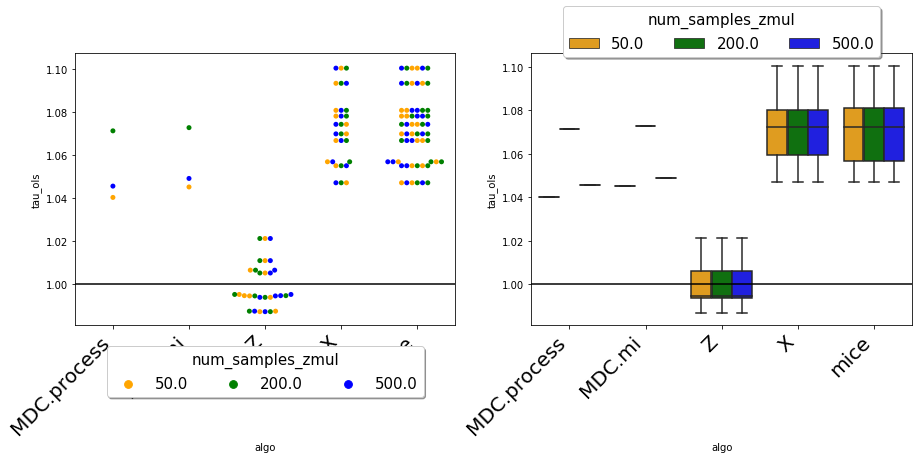

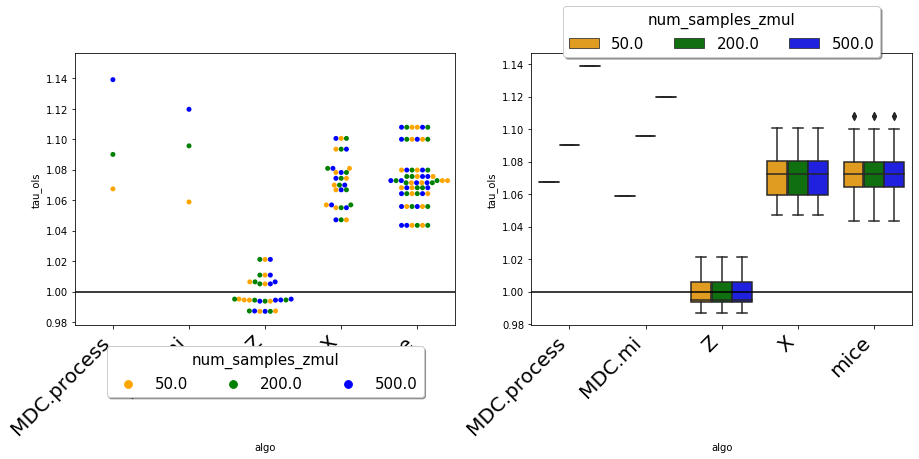

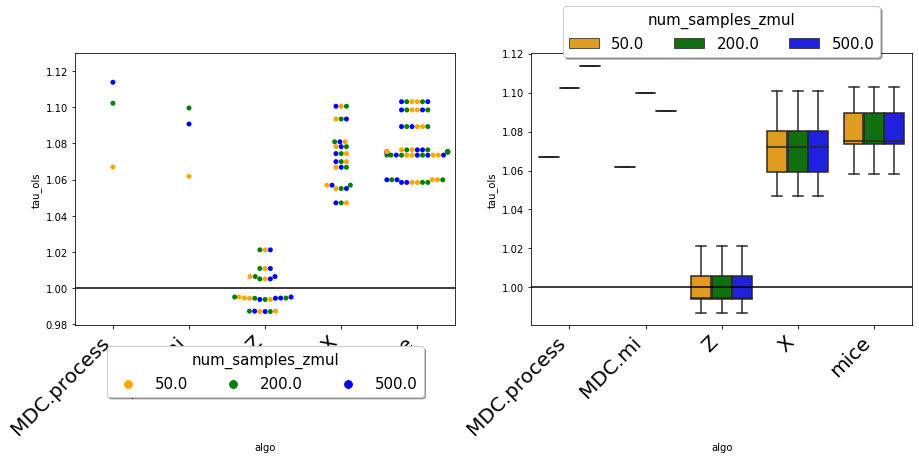

In [33]:
sig_prior = 10
n_epochs = 10
n = 1000
p = 100
add_wy = False
citcio = False
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['seed'] == 0) & (df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                              df_mice_results = df_mice, loss = loss, 
                              hue = 'num_samples_zmul', palette=['orange','green', 'blue'], save_plot = 'varyingB.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['seed'] == 0) & (df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                          df_mice_results = df_mice, loss = loss, 
                          hue = 'num_samples_zmul', palette=['orange','green', 'blue'])


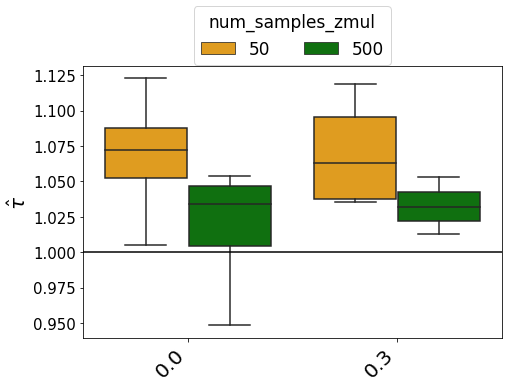

In [82]:
loss = 'tau_dr'
sig_prior = 1
n_epochs = 10
n = 1000
p = 100
add_wy = False
citcio = False
full_baseline = True
tmp = df.loc[((df['num_samples_zmul']==50) | (df['num_samples_zmul']==500))& ((df['prop_miss']==0) | (df['prop_miss']==0.3)) & (df['seed']<=4) & (df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior)]
hue = 'num_samples_zmul'
palette=['orange','green','blue']
ground_truth = pd.DataFrame({'tau': [1]})


plt.figure(figsize=(7.5,5))
# ax1 = plt.subplot(1,2,1)
# ax1 = sns.boxplot(x='prop_miss', y=loss, hue = hue, data=tmp.loc[(tmp['algo']=='MDC.process'),], palette = palette)
# if (loss == 'tau_dr') | (loss == 'tau_ols') | (loss == 'tau_ols_ps'):
#     plt.axhline(y=np.mean(ground_truth['tau']), color='k')
# for tick in ax1.xaxis.get_major_ticks():
#     tick.label.set_fontsize(20)
# for tick in ax1.yaxis.get_major_ticks():
#     tick.label.set_fontsize(15)
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.ylabel(r'$\hat{\tau}$', fontsize=20, style='oblique')
# plt.xlabel('')
# # if ylim is not None:
# #     plt.ylim(ylim)
# lgd1 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
#         fancybox=True, shadow=False, ncol=4, title=hue, title_fontsize = 17, fontsize=17)

# ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(x='prop_miss', y=loss, hue = hue, data=tmp.loc[(tmp['algo']=='MDC.mi')], palette = palette)
if (loss == 'tau_dr') | (loss == 'tau_ols') | (loss == 'tau_ols_ps'):
    plt.axhline(y=np.mean(ground_truth['tau']), color='k')
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel(r'$\hat{\tau}$', fontsize=20, style='oblique')
plt.xlabel('')
# if ylim is not None:
#     plt.ylim(ylim)
lgd2 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
        fancybox=True, shadow=False, ncol=4, title=hue, title_fontsize = 17, fontsize=17)


figname = str('./figures/'+'_p'+ str(p) +'_'+'varyingB.pdf')

    
plt.savefig(figname, bbox_inches='tight',format='pdf')


In [ ]:
correlation_tau(df)

In [ ]:
#sns.pairplot(df[l_tau])

## DCOV

In [945]:
df = load_results('exp_29.1_10_small.csv_temp')
#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


columns = df.columns.tolist()
columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))
df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
df.head()

results.shape (76, 24)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,True,1.081424,1.081779,1.081908,0.499922,0.119565,0.081424,0.081779,0.081908,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,True,1.001166,1.001854,0.999689,0.706796,0.663552,0.001166,0.001854,0.000311,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,True,1.103148,1.103060,1.109032,0.412992,0.105296,0.103148,0.103060,0.109032,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,True,0.994866,0.993980,0.995914,0.690837,0.595437,0.005134,0.006020,0.004086,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,True,1.077038,1.076966,1.074978,0.525174,0.127417,0.077038,0.076966,0.074978,MDC.process


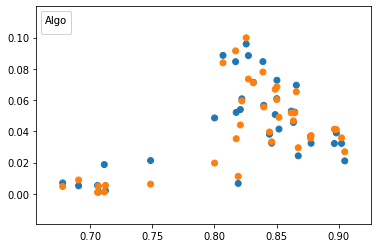

In [949]:
loss = '|1-tau_dr|'
df_ = df.copy()
df_ = df_.loc[(df_['p'] == 100)]
df_ = df_.loc[df_['model']=="dlvm"]
#df_ = df_.loc[df_['add_wy'] == False]
df_ = df_.loc[df_['citcio'] == False] 
#df_ = df_.loc[df_['n_epochs'] == 400] 
#df_ = df_.loc[df_['sig_prior']== 0.1]
#df_ = df_.loc[df_['prop_miss'] == 0.1]


#sns.swarmplot(x='dcor_zhat', y=loss, hue = 'algo', data=df_)

colors = {'MDC.process':'tab:blue', 'MDC.mi':'tab:orange'}

fig, ax = plt.subplots()
scatter = ax.scatter(df_['dcor_zhat'], y=df_[loss], c=df_['algo'].apply(lambda x: colors[x]))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Algo")
ax.add_artist(legend1)

plt.show()


# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# corr = df_[list(['dcor_zhat', '|1-tau_dr|', '|1-tau_ols|'])].corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr, mask=mask, center=0, #, cmap=cmap
#                 square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Correlation between dcor(Zhat) and bias')